In [62]:
from matrixBreak import *
import numpy as np
import json

In [63]:
with open('data.json', 'r') as fp:
    data = json.load(fp)

## Gráfico de tempo de processamento por tamanho da matriz (até 10 x 10)

<Figure size 432x288 with 0 Axes>

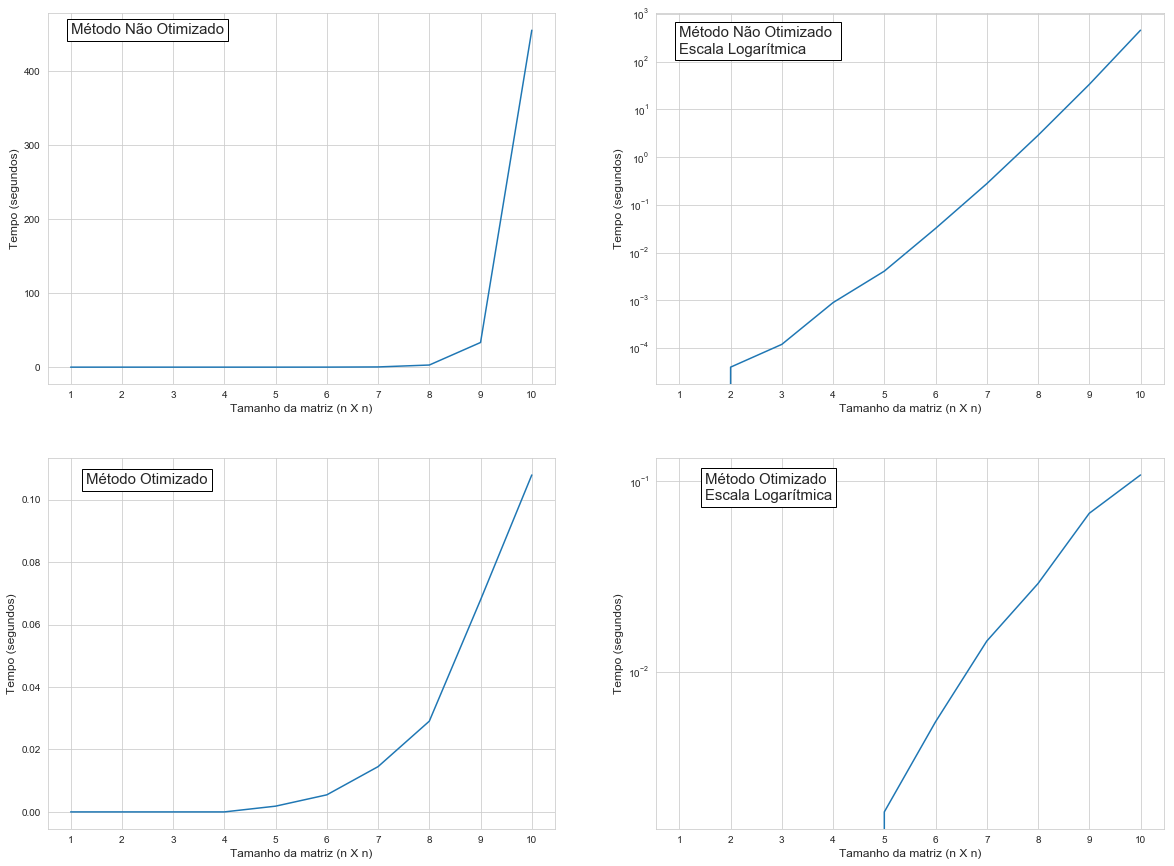

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.despine()

oldKeys,oldValues = list(data['old'].keys()),list(data['old'].values())
newKeys,newValues = list(data['new'].keys())[:10],list(data['new'].values())[:10]
oldKeys = [int(k) for k in oldKeys]
newKeys = [int(k) for k in newKeys]
oldValues = [np.nan_to_num(val) for val in oldValues]
newValues = [np.nan_to_num(val) for val in newValues]



f, axes = plt.subplots(2,2, figsize=(20,15))


sns.lineplot(x=oldKeys,y=oldValues,ax=axes[0,0])
sns.lineplot(x=oldKeys,y=oldValues,ax=axes[0,1])

sns.lineplot(x=newKeys,y=newValues,ax=axes[1,0])
sns.lineplot(x=newKeys,y=newValues,ax=axes[1,1])

temp = [0,1]
for q in temp:
    for w in temp:
        axes[q,w].set_xlabel('Tamanho da matriz (n X n)',fontsize=12)
        axes[q,w].set_ylabel('Tempo (segundos)',fontsize=12)
        axes[q,w].set_xticks(oldKeys)
        if w == 1:
            axes[q,w].set_yscale('log')

axes[0,0].text(1,450,'Método Não Otimizado',fontsize=15,bbox=dict(facecolor='white',edgecolor='black'))
axes[0,1].text(1,150,'Método Não Otimizado \nEscala Logarítmica',fontsize=15,bbox=dict(facecolor='white',edgecolor='black'))

axes[1,0].text(1.3,0.105,'Método Otimizado',fontsize=15,bbox=dict(facecolor='white',edgecolor='black'))
axes[1,1].text(1.5,0.08,'Método Otimizado\nEscala Logarítmica',fontsize=15,bbox=dict(facecolor='white',edgecolor='black'))


plt.show()
# f.savefig('plots.png')
f.savefig('plots.png')

s

In [68]:
keys,vals = list(data['new'].keys()),list(data['new'].values())

vals=[np.nan_to_num(val,nan=0) for val in vals]

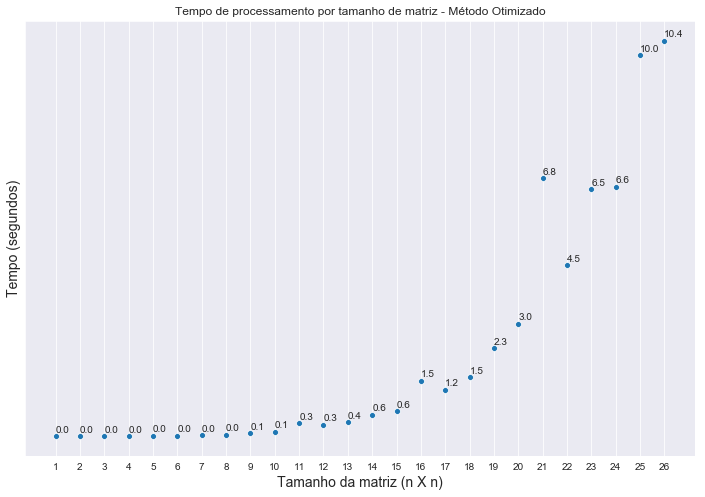

In [70]:
sns.set_style("darkgrid")


f2,axes2 = plt.subplots(1,1,figsize=(12,8))


sns.scatterplot(x=keys,y=vals,ax=axes2)

for i in range(len(vals)):
    axes2.annotate(round(vals[i],1), (keys[i], vals[i]+.1))

axes2.set_yticks([])
axes2.set_xlabel('Tamanho da matriz (n X n)',fontsize=14)
axes2.set_ylabel('Tempo (segundos)',fontsize=14)
axes2.set_title('Tempo de processamento por tamanho de matriz - Método Otimizado')

plt.show()

## Testando a diferença entre o método inicial e o otimizado
(Pensando em alguma forma de deixar visual)

In [74]:
errorCount = 0

for size in range(5):

    for i in range(1000):
        np.random.seed(i)
        matrixTest = np.random.randint(2,size=(size+1,size+1))
        status = oldMatrixBreak([matrixTest],matrixTest)[0] == matrixBreak([matrixTest],matrixTest)[0]
        if status == False:
            errorCount+=1
        
print(errorCount)

0
